This is an alternative approach which uses an evolutionary approach to search the space of possible rules and continuously improves the rule bae if possible.

First import and define helper functions

In [1]:
import csv
import numpy as np
from copy import deepcopy

def load_data(path):
    """
    Returns a dictionary containing the following values: t_2, t_1, t, d_2, d_1, d, p
    """
    t_2, t_1, t = [], [], []
    d_2, d_1, d = [], [], []
    p = []
    
    with open(path, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            t_2.append(float(row['T(t-2)']))
            t_1.append(float(row['T(t-1)']))
            t.append(float(row['T(t)']))
            d_2.append(float(row['D(t-2)']))
            d_1.append(float(row['D(t-1)']))
            d.append(float(row['D(t)']))
            p.append(float(row['P(t+1)']))
            
    return {'t_2': t_2, 't_1': t_1, 't': t, 'd_2': d_2, 'd_1': d_1, 'd': d, 'p': p}        

def load_training_data():
    """
    Returns a dictionary containing the following values: t_2, t_1, t, d_2, d_1, d, p
    """
    return load_data('./data/2018_CI_Assignment_Training_Data.csv')

def load_test_data():
    """
    Returns a dictionary containing the following values: t_2, t_1, t, d_2, d_1, d, p
    """
    return load_data('./data/2018_CI_Assignment_Testing_Data.csv')

def remove_outliers(x):
    x = deepcopy(x)
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    range = [Q1-1.5*(Q3-Q1),Q3+1.5*(Q3-Q1)]
    positions = np.concatenate((np.where(x>range[1]),np.where(x<range[0])),axis=1)[0]
    outliers = np.take(x, positions)
    if len(outliers) > 0:
        print('Removed outliers: \n%s' % outliers)
    return np.delete(x, positions), positions

def remove_outliers_from_dataset(data):
    data = deepcopy(data)
    
    positions = set()
    for key in data:
        d, pos = remove_outliers(data[key])
        positions.update(pos)
    
    for key in data:
        data[key] = np.delete(data[key], list(positions))
    
    return data

Removed outliers: 
[ 64.85  72.77  95.09 103.77  97.24  69.41 155.25  55.3   59.61 101.08
 101.74 196.34 276.91 460.29 156.48 153.28 323.31  80.21  52.4   54.6
  54.69  52.18  58.32  56.47  71.13 144.21 187.   274.49 274.7   62.48
  71.91 183.76 109.23  64.6   55.71  79.26 216.23  59.87  84.36  80.19
  54.32  55.05 273.72  62.06  98.49 188.27  62.18  59.81  72.24  52.56
  55.95  54.8   53.5   54.07  55.4 ]
Removed outliers: 
[ 59.53  63.49 102.73 162.74 213.1  134.67 192.36 128.53 127.75 131.21
 213.88  99.3   99.3   59.32  56.08  59.05  58.03  58.13  60.12  56.34
 138.32]


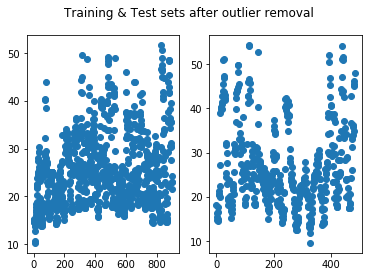

Correlation Coefficients Matrix Values: 
[[1.         0.97711422 0.94083427 0.43523077 0.49341031 0.54010843
  0.49325377]
 [0.97711422 1.         0.97678556 0.37103657 0.43915887 0.49715253
  0.46219849]
 [0.94083427 0.97678556 1.         0.29729518 0.37354107 0.44142236
  0.41799108]
 [0.43523077 0.37103657 0.29729518 1.         0.98603698 0.9497314
  0.52955784]
 [0.49341031 0.43915887 0.37354107 0.98603698 1.         0.98603361
  0.56492116]
 [0.54010843 0.49715253 0.44142236 0.9497314  0.98603361 1.
  0.5877078 ]
 [0.49325377 0.46219849 0.41799108 0.52955784 0.56492116 0.5877078
  1.        ]]


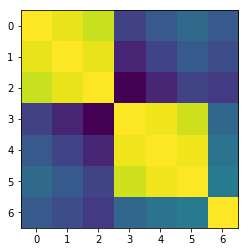

In [2]:
# -*- coding: utf-8 -*-
%matplotlib inline
"""
Created on Mon Apr  9 12:09:26 2018

@author: 19591676
"""

import sys
from datetime import datetime
from random import choice
from copy import deepcopy
import numpy as np
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Print helper method
def print_inplace(text, percentage, time_taken=None, comment=""):
        percentage = int(percentage)
        length_factor = 5
        progress_bar = int(round(percentage/length_factor)) * "*" + (round((100-percentage)/length_factor)) * "."
        progress_bar = progress_bar[:round(len(progress_bar)/2)] + "|" + str(int(percentage)) + "%|" + progress_bar[round(len(progress_bar)/2):]
        sys.stdout.write("\r%s |%s|" % (text, progress_bar) + (" Time: %s" % str(time_taken).split(".")[0] if time_taken else "") + comment)
        sys.stdout.flush()

        if percentage == 100:
            print()

""" Data loading and preprocessing """
training_data = load_training_data()
training_data = remove_outliers_from_dataset(training_data)

plt.subplot(121)
plt.plot(training_data['p'], 'o')
plt.suptitle('Training & Test sets after outlier removal')

test_data = load_test_data()
test_data = remove_outliers_from_dataset(test_data)

plt.subplot(122)
plt.plot(test_data['p'], 'o')
plt.show()

""" Correlation matrix """
# TODO: This could be automated
trainingA = np.row_stack((training_data['t_2'], training_data['t_1'], training_data['t'],
                          training_data['d_2'], training_data['d_1'], training_data['d'],
                          training_data['p']))

correlationCoefficients = np.corrcoef(trainingA)
fig = plt.figure()
ax = fig.add_subplot(111)
print('Correlation Coefficients Matrix Values: \n%s' % correlationCoefficients)
ax.imshow(correlationCoefficients, interpolation='nearest')
plt.show()

# Choose t-2, d and p for data set
trainingA = np.row_stack((training_data['t_2'], training_data['d'], training_data['p']))

Membership functions have to be automatically generated since their number is parameterized

Membership functions:


C:\Program Files\Anaconda\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


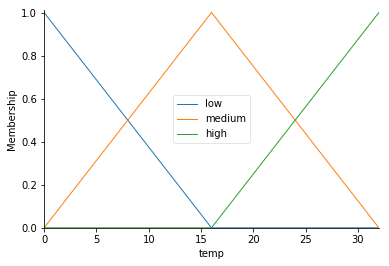

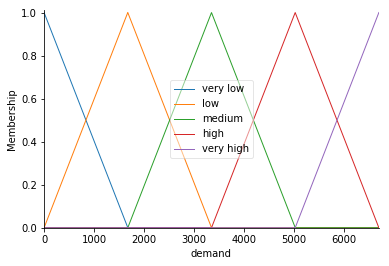

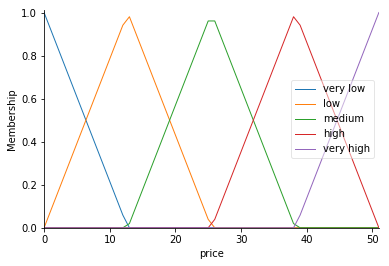

In [3]:
""" Fuzzy membership function definitions """
TEMP_SUBSETS = 3
DEMAND_SUBSETS = 5
PRICE_SUBSETS = 5

def names(num_names):
    names = ('ultra low', 'very low', 'low', 'medium', 'high', 'very high', 'ultra high')
    
    if num_names == 7:
        return list(names)
    if num_names == 5:
        return list(names[1:-1])
    if num_names == 3:
        return list(names[2:-2])
    raise Exception('Illegal number of names')

temp = ctrl.Antecedent(np.arange(0, max(training_data['t_2']), 1), 'temp')
temp.automf(TEMP_SUBSETS, names=names(TEMP_SUBSETS))
demand = ctrl.Antecedent(np.arange(0, max(training_data['d']), 1), 'demand')
demand.automf(DEMAND_SUBSETS, names=names(DEMAND_SUBSETS))
price = ctrl.Consequent(np.arange(0, max(training_data['p']), 1), 'price')
price.automf(PRICE_SUBSETS, names=names(PRICE_SUBSETS))

universes = [temp, demand, price]

print('Membership functions:')
for universe in universes:
    universe
    universe.view()
    
""" Fuzzy rules definitions """
# create all possible rules
allRules = []
for tmp_name in names(TEMP_SUBSETS):
    for dem_name in names(DEMAND_SUBSETS):
        for out_name in names(PRICE_SUBSETS):
            allRules.append(ctrl.Rule(temp[tmp_name] | demand[dem_name], price[out_name]))

""" Feature selection: Evolutionary approach """
# Parameters
start = datetime.now()

TOTAL_FEATURES = TEMP_SUBSETS * DEMAND_SUBSETS * PRICE_SUBSETS
ITERATIONS = TOTAL_FEATURES * 2 // 3


def build_simulation(rule_indices):
    rules = [rule for rule, selected in zip(allRules, rule_indices) if selected]
    control_system = ctrl.ControlSystem(rules)
    return ctrl.ControlSystemSimulation(control_system)

    
def evaluate_simulation(simulation, evaluation_dataset):
    error = 0
    for t2, d, p in zip(evaluation_dataset["t_2"], evaluation_dataset["d"], evaluation_dataset["p"]):
        simulation.input["temp"] = t2
        simulation.input["demand"] = d
        simulation.compute()
        error += abs(simulation.output['price'] + p)/p
        
    return -error/len(test_data['p'])


def evaluate_population(pop, evaluation_dataset):
    simulation = build_simulation(pop)
    return evaluate_simulation(simulation, evaluation_dataset)
    

def mutate(pop, index, direction):
    """ Mutates(flips) each gene and evaluates it. Returns a tuple (accuracy, population) """
    # print_inplace('Mutation %s/%s' % (index, len(pop)), index/len(pop)*100, time_taken=datetime.now()-start)
    new_pop = list(deepcopy(pop))
    
    if new_pop[index] != direction:             # Mutate if not already active
        new_pop[index] = direction
        return evaluate_population(new_pop, training_data), new_pop
    
    return -100000, new_pop                     # Return -1 accuracy if mutation was not performed

For the defuzzyfication to work we need at least two rules, covering enough of the rule space. We choose all low and all high from expert knowledge as a reasonable initialization. These initial rules can be unselected by the process later on.

In [4]:
# Generate initial population
population = [False for i in range(TOTAL_FEATURES)]
population[0], population[-1] = True, True
best_population = evaluate_population(population, training_data), deepcopy(population)

for i in range(ITERATIONS):
    print_inplace('Feature selection iteration %s/%s' % (i+1, ITERATIONS), i/ITERATIONS*100, time_taken=datetime.now()-start, comment=' | Best Population: Average Error: %s, population: %s' % (abs(best_population[0]), best_population[1]))
    
    # Add Rules
    for takes in range(2):
        score, population = max([mutate(population, index, True) for index in range(len(population))])
        # Save best performing
        if score > best_population[0]:
            best_population = score, deepcopy(population)
   
    # Remove Rules
    for takes in range(1):
        score, population = max([mutate(population, index, False) for index in range(len(population))])
        # Save best performing
        if score > best_population[0]:
            best_population = score, deepcopy(population)

print("Best Population:")
print(best_population[1])
print('Average error on training set: %s' % best_population[0])

# Evaluate best population on testset
print('Average error on training set: %s' % evaluate_population(best_population[1], test_data))

Feature selection iteration 1/50 |..........|0%|..........| Time: 0:00:00 | Best Population: Average Error: 5.558270594182665, population: [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True]

KeyboardInterrupt: 